<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

Se cargan los datos

In [13]:
data = pd.read_csv('vinos.csv', encoding='UTF-8')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Se muestra el nombre de todas las columnas y en el formato en el que están

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [16]:
data.shape

(1599, 12)

In [17]:
data.isnull().values.any() 

False

NO HAY NA'S

In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Las 5 caracteristicas más influyentes que se han considerado han sido:

pH, total sulfur dioxide, fixed acidity, alcohol y sulphates

In [19]:
data1 = data.drop(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density'], axis=1)
data1.head()

,fixed acidity,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,34.0,3.51,0.56,9.4,5
1,7.8,67.0,3.20,0.68,9.8,5
2,7.8,54.0,3.26,0.65,9.8,5
3,11.2,60.0,3.16,0.58,9.8,6
4,7.4,34.0,3.51,0.56,9.4,5


In [20]:
data1.describe()

,fixed acidity,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,289.000000,4.010000,2.000000,14.900000,8.000000


Se eliminan los valores atípicos

In [21]:
condicion = data1['total sulfur dioxide'] > 100
filas_a_eliminar=data1[condicion]

data1 = data1.drop(filas_a_eliminar.index, axis=0)

Se muestra la forma de nuestro dataset actualizada

In [22]:
data1.shape

(1472, 6)

In [23]:
data1.columns

Index(['fixed acidity', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Para 5 de las características que consideres que más influyen: calcula y establece qué tipo de relación hay
entre ellas, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido

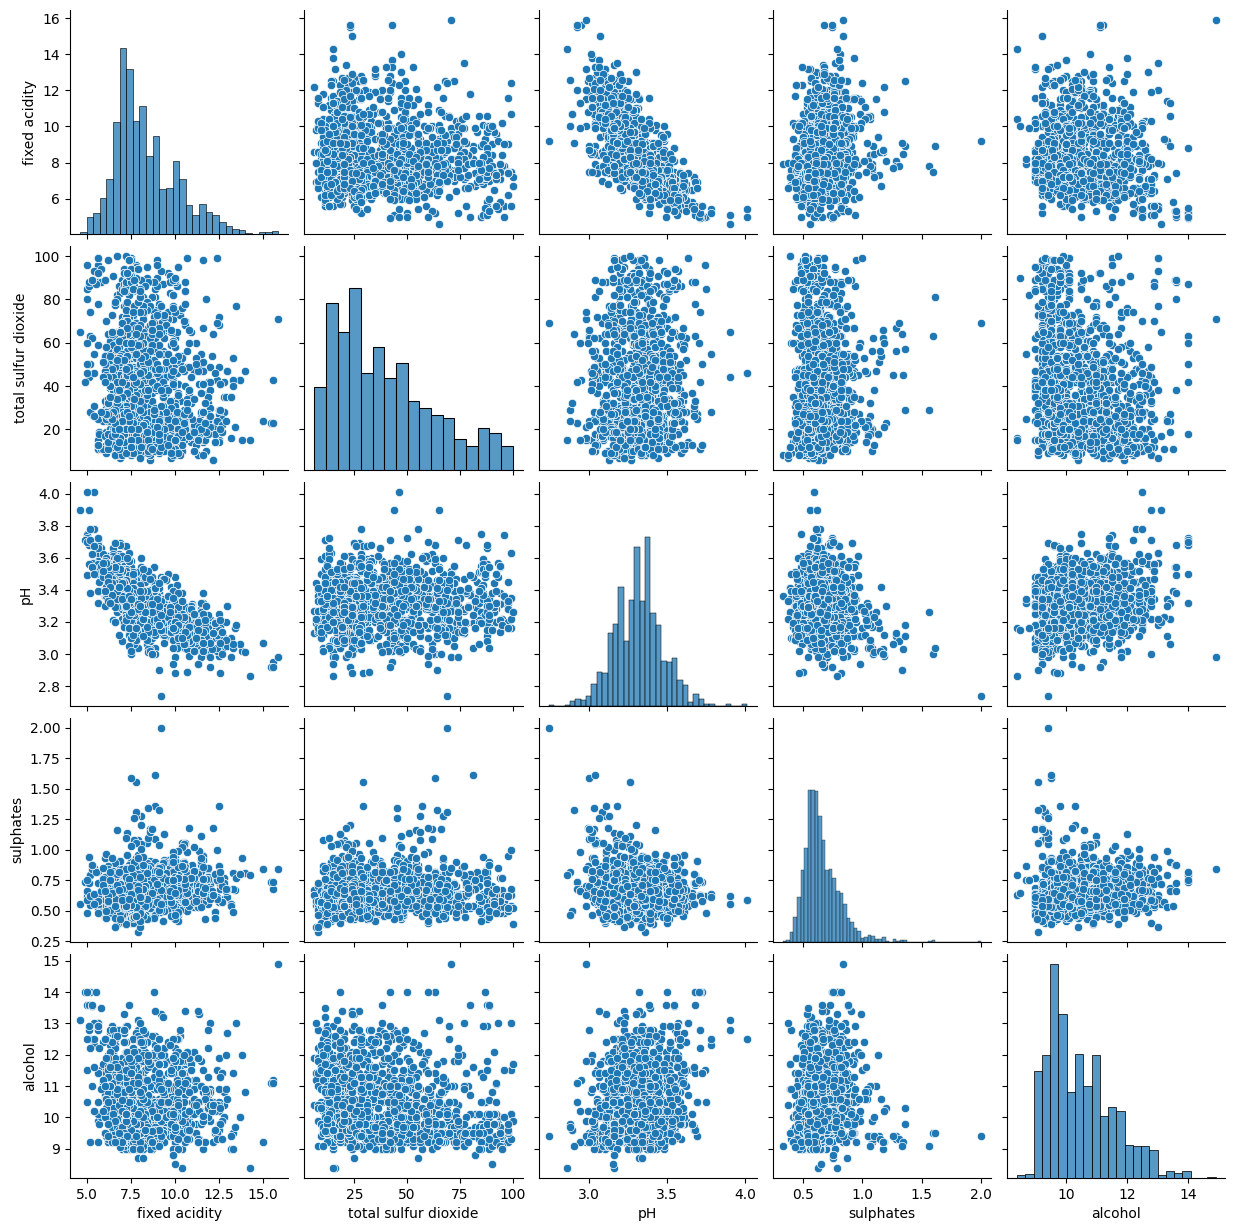

In [24]:
import seaborn as sns

# Crear un diagrama de dispersión para todas las combinaciones posibles de las características
data1sinquality=data1.drop('quality', axis=1)
sns.pairplot(data1sinquality)

para 5 de las características que consideres que más influyen: calcula y establece qué tipo de relación hay
entre ellas, dibuja un diagrama de dispersión con los casos en el que también se incluya el modelo obtenido

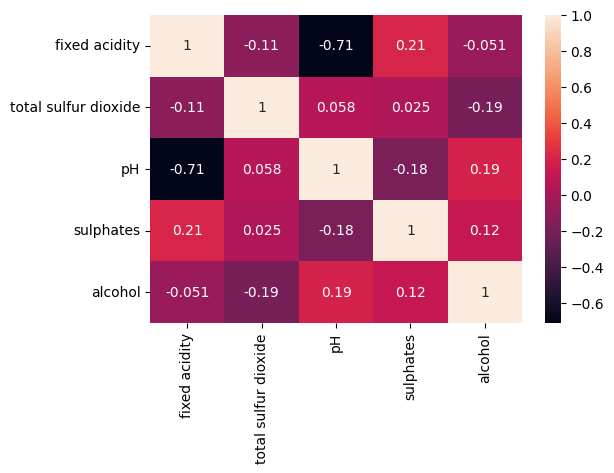

In [25]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))

data_corr = data1sinquality.corr()
sns.heatmap(data_corr, annot=True);

Se crea el modelo

In [26]:
x = data1[['pH', 'total sulfur dioxide','fixed acidity', 'alcohol', 'sulphates']]
y = data1['quality']

model = LinearRegression().fit(x,y)


Se cargan los datos que mas adelante se  usaran para hacer las predicciones 

In [27]:
new_vinos = pd.DataFrame({'pH': [4, 3, 2.5],
                          'total sulfur dioxide': [41.1, 53.2, 33.1],
                          'fixed acidity': [7.3, 7, 6.8],
                          'alcohol': [8.8, 9.9, 9],
                          'sulphates': [0.7, 0.97, 0.65]})

Se predice

In [28]:
prediccion = model.predict(new_vinos)
print('La calidad del vino es:', prediccion)

La calidad del vino es: [4.75980084 5.98531147 5.61456721]


2) Explica cómo funcionaría el posible sistema para clasificar vinos (simplifica la variable “quality” creando 4
clases: muy malo, malo, bueno, muy bueno) creado con los 3 parámetros que más influyen entre los
descritos arriba. (0,5 puntos)

Para analizar cuales son los 3 parámetros que influyen se va a crear un mapa de calor

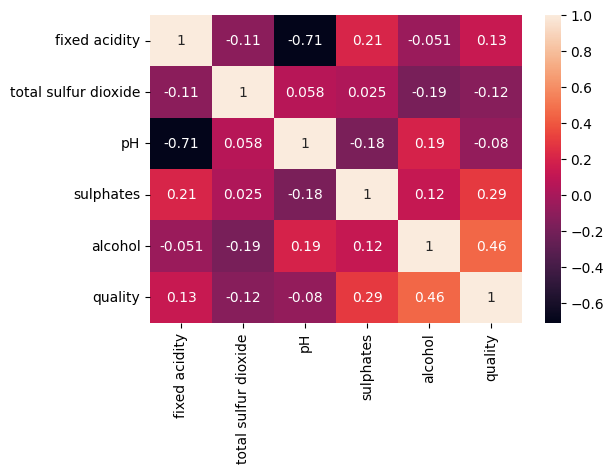

In [29]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))

data_corr = data1.corr()
sns.heatmap(data_corr, annot=True);

los 3 parámetros que más influyen son: alcohol, sulphates y fixed acidity

Se crean los rangos para clasificar la calidad del vino y por ende las etiquetas que estas van a obtener.
Esto ha servido para poder clasificar los datos de la columna quality en una nueva columna quality_nueva
que toma los valores de (muy malo, malo, bueno, muy bueno)

In [30]:
rangos_quality_nueva = [2.9, 4.20, 5.40, 6.80, 8] 
quality_nueva = ['muy malo', 'malo', 'bueno', 'muy bueno'] 
data1['quality_nueva'] = pd.cut(data1['quality'], bins=rangos_quality_nueva, labels=quality_nueva)
data1.head()

,fixed acidity,total sulfur dioxide,pH,sulphates,alcohol,quality,quality_nueva
0,7.4,34.0,3.51,0.56,9.4,5,malo
1,7.8,67.0,3.20,0.68,9.8,5,malo
2,7.8,54.0,3.26,0.65,9.8,5,malo
3,11.2,60.0,3.16,0.58,9.8,6,bueno
4,7.4,34.0,3.51,0.56,9.4,5,malo


Se crea el modelo que se va a utilizar: Este es DecisionTreeClassifier ya que tenemos nuestra variable quality que es un objeto

In [31]:
x = data1[['fixed acidity', 'alcohol', 'sulphates']]
y = data1['quality_nueva']

model = DecisionTreeClassifier().fit(x, y)

Se cargan los datos que mas adelante se usaran para hacer las predicciones

In [32]:
new_vinos2 = pd.DataFrame({'fixed acidity': [7.3, 7, 6.8],
                          'alcohol': [8.8, 9.9, 9],
                          'sulphates': [0.7, 0.97, 0.65]})

Por último se hacen las predicciones para saber cúal es la calidad de estos vinos

In [33]:
prediccion = model.predict(new_vinos2)
print('La calidad del vino es:', prediccion)

La calidad del vino es: ['bueno' 'bueno' 'malo']
